## Wallet financiera con Python

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import yfinance as yfinance

#### Construccion de la clase "Wallet"

In [115]:
# 0. Inputs
info = {
    "ticks":["TSM", "TSLA", "NVDA", "META","LIT", "GOOG"],
    "start" : "2024-01-01",
    "end": "2024-12-20"
}

In [213]:
# Programaacion orientada a objetos
# 1. Construccion
class Wallet:

    def __init__(self, inputs):
        self.ticks = inputs["ticks"]
        self.start = inputs["start"]
        self.end = inputs["end"]

        # Descargar la informacion del ticker 
        self.download_info()

    def show_ticks(self):
        print(self.ticks)

    def download_info(self):
        self.data = yf.download(self.ticks, start = self.start, end = self.end)
        print("La informacion ha sido descargada con exito")

    def show_tick(self,tick):
        if tick in self.ticks:
            plt.figure(figsize = (10,6))
            plt.title(f'Close Time Series for {tick}')
            plt.xlabel("Date")
            plt.ylabel("Price USD")
            plt.plot(self.data["Close"][tick], label = tick)
            plt.legend()
            plt.show()

    def compare_ticks(self):
        tick1 = input("Tick 1: ")
        tick2 = input("Tick 2: ")
        if tick1 in self.ticks and tick2 in self.ticks:
            plt.figure(figsize=(10,6))
            plt.title(f'{tick1} versus {tick2}: Close Value')
            plt.xlabel(tick1)
            plt.ylabel(tick2)
            plt.plot(self.data["Close"][tick1], self.data["Close"][tick2], 'x')
            plt.show()
        else:
            print("Un tick o ambos no estan incluidos en los ticks. Intentar nuevamente")

    def returns(self, tick):
        if tick in self.ticks:
            returns = self.data["Close"][tick].pct_change()
            returns = returns[1:]
            plt.figure(figsize=(10,10))
            plt.title(f'Histogram of {tick} returns')
            #plt.xlabel()
            #plt.ylabel()
            plt.hist(returns, bins=50)
            plt.show()   
        else:
            print("Intentar nuevamente")

In [215]:
# 2. Inicializacion
w = Wallet(info)

[*********************100%***********************]  6 of 6 completed

La informacion ha sido descargada con exito


In [217]:
# 3. Interacción

In [219]:
 w.show_ticks()

['TSM', 'TSLA', 'NVDA', 'META', 'LIT', 'GOOG']


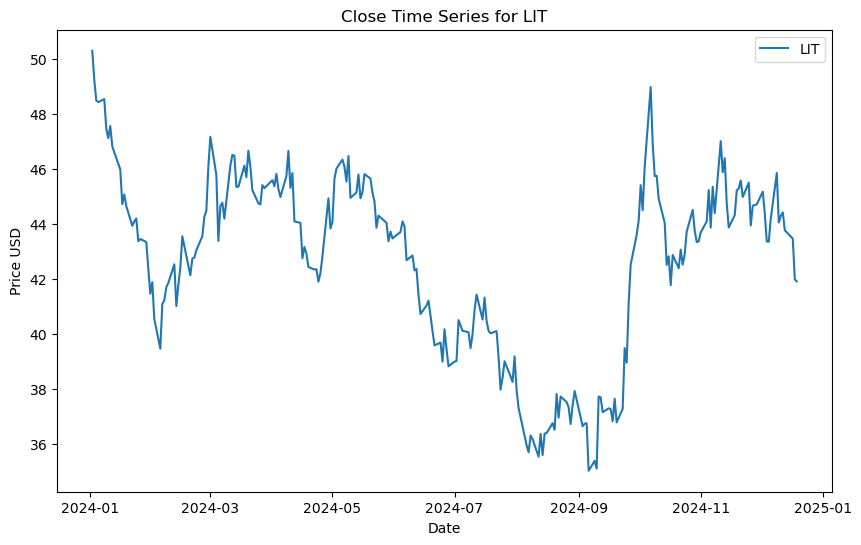

In [221]:
w.show_tick("LIT")

<Axes: xlabel='Date'>

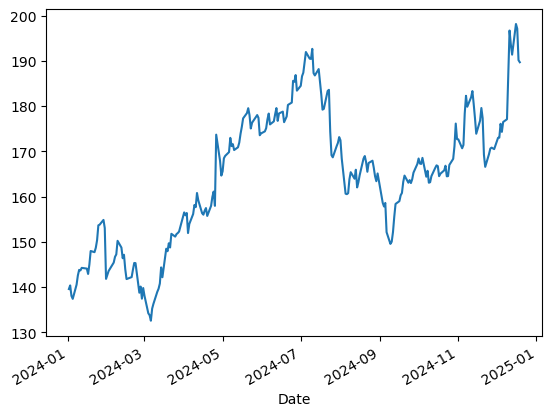

In [223]:
w.data["Close"]["GOOG"].plot()

<Axes: xlabel='Date'>

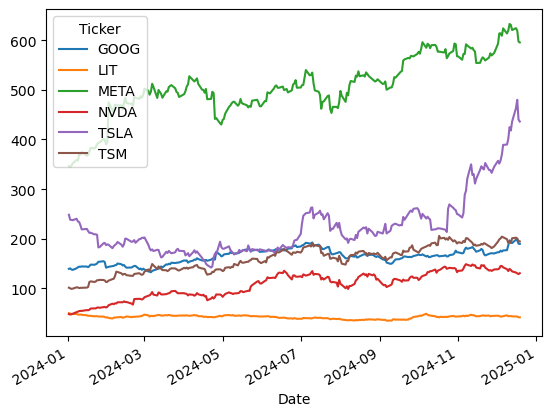

In [225]:
w.data["Close"].plot()

Tick 1:  NVDA
Tick 2:  LIT


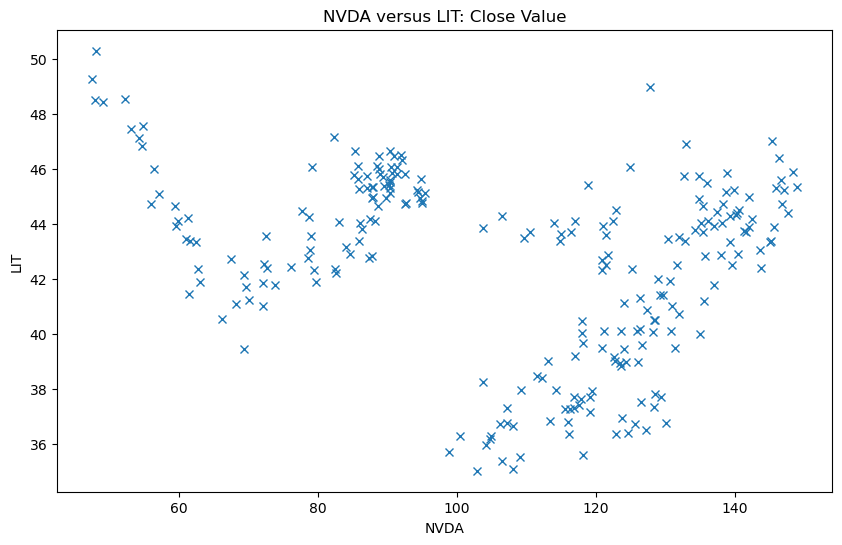

In [187]:
w.compare_ticks()

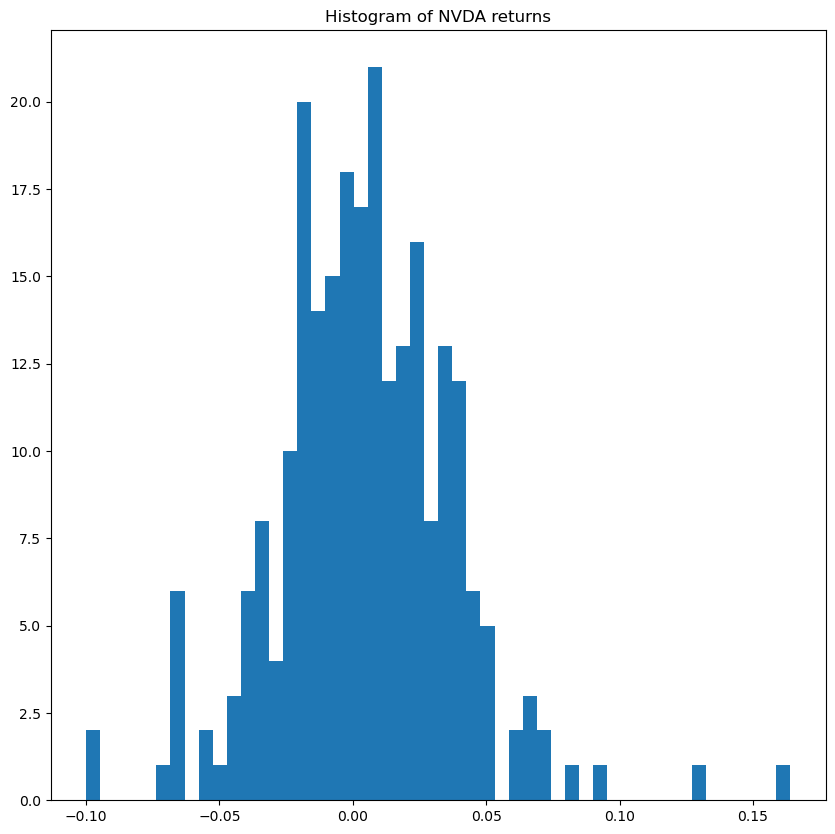

In [231]:
w.returns("NVDA")